# 데이터 시각화 연습문제 (2) - seaborn + 서브플롯

아래의 데이터는 2020년 02월 05일부터 2023년 05월 31일까지 서울시와 전국에 대한 코로나19의 누적 확진자, 일일 확진자, 누적 사망자에 대한 조사자료 일부이다.

https://data.hossam.kr/D01/covid19.xlsx

## 그래프 요구사항
- 아래의 내용을 모두 반영한 그래프를 생성하시오.
1. 사용자로부터 날짜를 yyyymmdd의 8자리 문자열로 입력받은 후 그 날짜를 시작으로 1주일간의 데이터를 추출하시오.
2. 2행 1열의 서브플롯을 만들고 각각의 그래프 영역에 대한 twinx를 생성하시오.
3. 첫 번째 영역에는 서울시의 누적 확진자와 일일 확진자 변동 추이를 확인할 수 있는 시각화 자료를 생성하시오.
4. 두 번째 영역에는 전국에 대한 누적 확진자와 일일 확진자 변동 추이를 확인할 수 있는 시각화 자료를 생성하시오.
5. 누적 확진자는 y축을 왼쪽으로 설정한 막대그래프로 표시하고 일일 확진자는 y축을 오른쪽으로 설정한 시계열 그래프로 생성해야 합니다.
6. seaborn을 활용하여 구현하세요.

### 1. 작업준비

In [28]:
# 패키지 참조
import seaborn as sb
from matplotlib import pyplot as plt
from pandas import read_excel
import datetime as dt

# 데이터 불러오기
data = read_excel('https://data.hossam.kr/D01/covid19.xlsx')
print(data)

# 데이터 타입 확인
data.dtypes

        서울시 기준일   서울 확진자  서울시 일일 확진  서울시 사망       전국 확진  전국 일일 확진  전국 사망
0    2023-05-31  6204277     5987.0    6492  31703511.0   24411.0  34784
1    2023-05-30  6198290     3326.0    6486  31679100.0   13529.0  34767
2    2023-05-29  6194964     1393.0    6485  31665571.0    6868.0  34760
3    2023-05-28  6194964     1393.0    6485  31665571.0    6868.0  34760
4    2023-05-27  6191196     4078.0    6485  31647238.0   17796.0  34784
...         ...      ...        ...     ...         ...       ...    ...
1207 2020-02-09       10        0.0       0        27.0       0.0      0
1208 2020-02-08       10        0.0       0        24.0       0.0      0
1209 2020-02-07       10        0.0       0        24.0       0.0      0
1210 2020-02-06       11        0.0       0        24.0       0.0      0
1211 2020-02-05        8        0.0       0        18.0       0.0      0

[1212 rows x 7 columns]


서울시 기준일      datetime64[ns]
서울 확진자                int64
서울시 일일 확진           float64
서울시 사망                int64
전국 확진               float64
전국 일일 확진            float64
전국 사망                 int64
dtype: object

### 2. 데이터 전처리
#### 1) 검색 날짜 변수 생성

In [29]:
# 날짜 입력 받기
input_date = input("검색일을 입력하세요(yyyymmdd)")
print(type(input_date))
print(input_date)

# 입력받은 날짜를 datetime객체로 생성
start_date = dt.datetime.strptime(input_date, '%Y%m%d')
print(type(start_date))
print(start_date)

<class 'str'>
20230501
<class 'datetime.datetime'>
2023-05-01 00:00:00


#### 2) 검색 종료일 구하기

In [30]:
delta = dt.timedelta(days=6)
end_date = start_date + delta
print(type(end_date))
print(end_date)

<class 'datetime.datetime'>
2023-05-07 00:00:00


#### 3) 검색 기간에 따른 데이터 추출

In [31]:
query_data = data.query('`서울시 기준일` >= @start_date and `서울시 기준일` <= @end_date')
target_data = query_data.sort_values('서울시 기준일')
target_data

,서울시 기준일,서울 확진자,서울시 일일 확진,서울시 사망,전국 확진,전국 일일 확진,전국 사망
30,2023-05-01,6078397,1112.0,6425,31176660.0,5774.0,34487
29,2023-05-02,6082360,3963.0,6428,31192401.0,15741.0,34497
28,2023-05-03,6087497,5137.0,6429,31212598.0,20197.0,34505
27,2023-05-04,6092424,4927.0,6432,31232744.0,20146.0,34512
26,2023-05-05,6097034,4650.0,6433,31251203.0,18752.0,34518
25,2023-05-06,6099419,2385.0,6434,31263004.0,11801.0,34521
24,2023-05-07,6103182,3763.0,6436,31277746.0,14742.0,34527


### 3. 데이터 시각화
#### 1) 그래프 설정

In [32]:
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams['axes.unicode_minus'] = False

#### 2) x축 레이블 만들기

In [33]:
# x축 좌표
x = list(range(0, len(target_data['서울시 기준일'])))
x

# x축 텍스트
xticks = []
for i in target_data['서울시 기준일']:
    xticks.append(i.strftime('%Y.%m.%d'))
xticks

['2023.05.01',
 '2023.05.02',
 '2023.05.03',
 '2023.05.04',
 '2023.05.05',
 '2023.05.06',
 '2023.05.07']

#### 3) 그래프 그리기

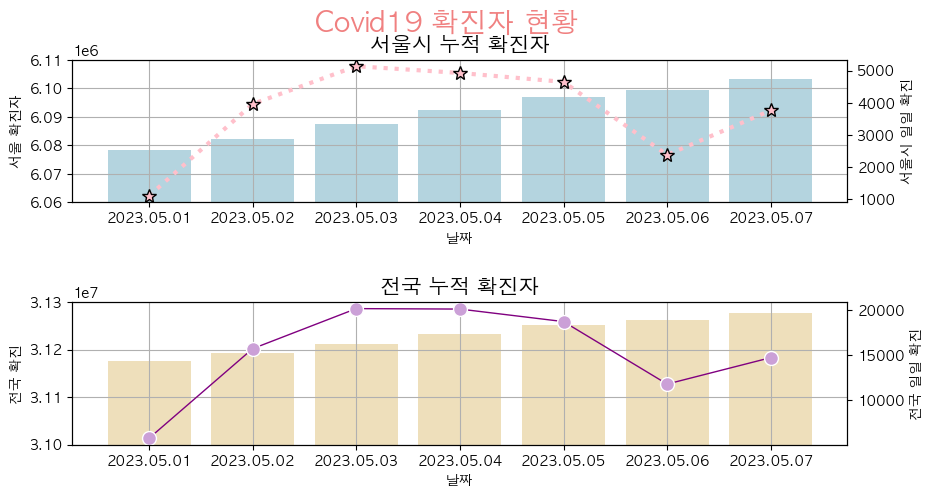

In [47]:
# 2행 1열 서브플롯
fig, (ax1_left, ax2_left) = plt.subplots(2, 1, figsize = (10, 5))

# 각 서브플롯별로 twinx 생성
ax1_right = ax1_left.twinx()
ax2_right = ax2_left.twinx()

# 전체 제목
fig.suptitle('Covid19 확진자 현황', fontsize = 20, color = 'lightcoral')

# 각 그래프 간의 세로(hspace) 간격 지정
fig.subplots_adjust(hspace = 0.7)

# 첫번째 왼쪽 그래프
sb.barplot(data = target_data, x = x, y='서울 확진자', color = 'lightblue', ax = ax1_left)
ax1_left.grid()
ax1_left.set_title('서울시 누적 확진자', fontsize = 15)
ax1_left.set_ylim(6060000, 6110000)
ax1_left.set_xticks(x)
ax1_left.set_xlabel('날짜')
ax1_left.set_xticklabels(xticks, fontsize = 10, rotation = 0)

# 첫번째 오른쪽 그래프
sb.lineplot(data=target_data, x=x, y='서울시 일일 확진', ax=ax1_right,
            color='pink', linestyle=':', linewidth=3,
            marker="*", markersize=10, markerfacecolor='pink',
            markeredgecolor="black", markeredgewidth=1)

# 두번째 왼쪽 그래프
sb.barplot(data = target_data, x = x, y = '전국 확진', color = '#F6E2B3', ax = ax2_left)
ax2_left.grid()
ax2_left.set_title('전국 누적 확진자', fontsize = 15)
ax2_left.set_xticks(x)
ax2_left.set_ylim(31000000, 31300000)
ax2_left.set_xlabel('날짜')
ax2_left.set_xticklabels(xticks, fontsize = 10, rotation = 0)

# 두번째 오른쪽 그래프
sb.lineplot(data=target_data, x=x, y='전국 일일 확진', ax=ax2_right,
            color='purple', linestyle='-', linewidth=1,
            marker="o", markersize=10, markerfacecolor='#CBA0D7',
            markeredgecolor="white", markeredgewidth=1)

plt.show()
plt.close()